# Simple moving Signal

## Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from finta import TA

## Read dataset

In [2]:
df = pd.read_csv('HDB.csv', parse_dates=True, index_col=[0])

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-30,34.279999,34.490002,34.040001,34.174999,33.556362,914400
2017-01-31,34.154999,34.669998,34.080002,34.465000,33.841114,1274200
2017-02-01,34.935001,35.264999,34.535000,35.090000,34.454803,2424400
2017-02-02,35.105000,35.150002,34.880001,35.075001,34.440075,1616800
2017-02-03,35.430000,35.685001,35.235001,35.660000,35.014481,1239400


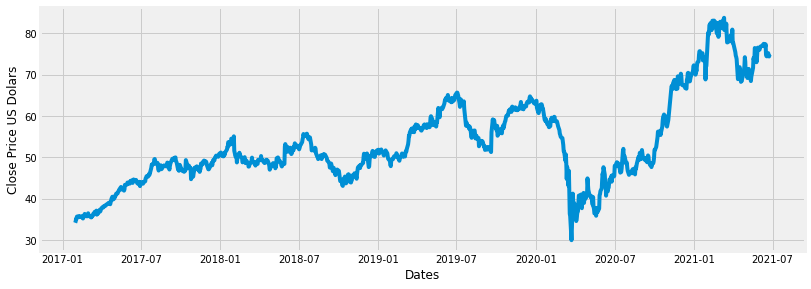

In [4]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df['Close'])
plt.xlabel('Dates')
plt.ylabel('Close Price US Dolars')
plt.show()

In [6]:
df.columns = df.columns.str.lower()

In [7]:
# Create a columns with SMA =20 peeriod and SMA for a 50
df['SMA20'] = TA.SMA(df, period=20, column='close')
df['SMA50'] = TA.SMA(df, period=50, column='close')

In [9]:
# get the signal to buy and sell
df['signal'] = np.where(df['SMA20'] > df['SMA50'], 1,0)
df['position'] = df['signal'].diff()

df['buy'] = np.where(df['position']==1, df['close'], np.nan)
df['sell'] = np.where(df['position']==-1, df['close'], np.nan)

## Viz

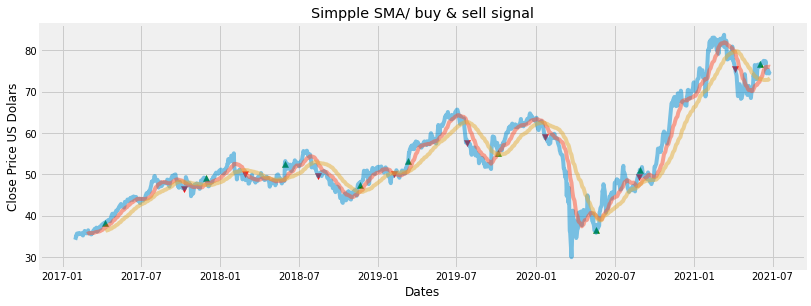

In [12]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df['close'], alpha = 0.5, label ='Close')
plt.plot(df['SMA20'], alpha = 0.5, label ='SMA20')
plt.plot(df['SMA50'], alpha = 0.5, label ='SMA50')
plt.scatter(df.index, df['buy'], marker='^', color = 'green', label = 'Buy signal', alpha=1)
plt.scatter(df.index, df['sell'], marker='v', color = 'red', label= 'Sell signal', alpha=1)
plt.title('Simpple SMA/ buy & sell signal')
plt.xlabel('Dates')
plt.ylabel('Close Price US Dolars')
plt.show()